# Local DP Laplace Mechanism under Poisoning Attack (Variance Estimation)

This notebook evaluates the robustness of Local Differential Privacy (LDP) in estimating the variance using the Laplace mechanism. 

We analyze how adversaries performing poisoning attacks affect the utility of the estimator under different data distributions.

- uniform distribution
- normal distribution

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
n = 10000
epsilon = 1.0
gamma_values = np.linspace(0, 0.3, 5)
num_trials = 5

# Simulation

def simulate_ldp_variance(n, epsilon, gamma, attack_type, dist_sampler):
    scale = 1 / epsilon
    n_corrupt = int(gamma * n)
    n_honest = n - n_corrupt

    honest_data = dist_sampler(n_honest)

    if attack_type == "OPA":
        poison_value = 1 + 3 / epsilon  # maximize variance
        corrupt_data = np.full(n_corrupt, poison_value)
    elif attack_type == "IPA":
        corrupt_data = np.ones(n_corrupt)  # upper bound in [0,1]

    combined_data = np.concatenate([honest_data, corrupt_data])
    noisy_data = combined_data + np.random.laplace(scale=scale, size=n)
    return np.var(noisy_data, ddof=0)

# Run experiment

def run_ldp_experiment(dist_sampler):
    results = {"OPA": [], "IPA": []}
    for gamma in gamma_values:
        for attack in ["OPA", "IPA"]:
            trials = [simulate_ldp_variance(n, epsilon, gamma, attack, dist_sampler) for _ in range(num_trials)]
            mean = np.mean(trials)
            std = np.std(trials)
            results[attack].append((gamma, mean, mean - 2 * std, mean + 2 * std))
    return results

# Plotting

def plot_ldp_results(results, title, baseline_var):
    plt.figure(figsize=(8, 5))
    for attack, color in zip(["OPA", "IPA"], ["red", "blue"]):
        arr = np.array(results[attack])
        plt.plot(arr[:, 0], arr[:, 1], marker='o', label=attack, color=color)
        plt.fill_between(arr[:, 0], arr[:, 2], arr[:, 3], color=color, alpha=0.2)
    plt.axhline(baseline_var, color='black', linestyle='--', label='True Variance')
    plt.xlabel("Corruption Ratio γ")
    plt.ylabel("Estimated Variance")
    plt.title(title)
    plt.legend()
    plt.tight_layout()
    plt.show()

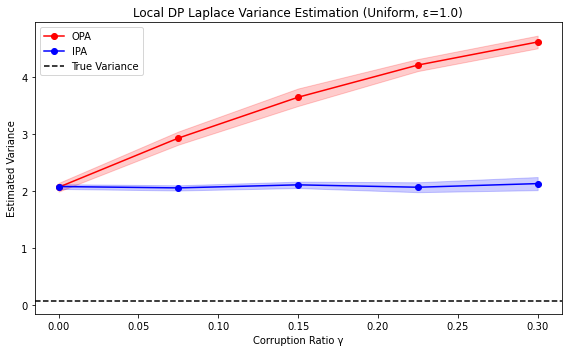

In [5]:
# Uniform[0,1] Distribution
np.random.seed(42)
uniform_sampler = lambda n: np.random.uniform(0, 1, size=n)
baseline_variance_uniform = 1 / 12
results_uniform = run_ldp_experiment(uniform_sampler)
plot_ldp_results(results_uniform, "Local DP Laplace Variance Estimation (Uniform, ε=1.0)", baseline_variance_uniform)

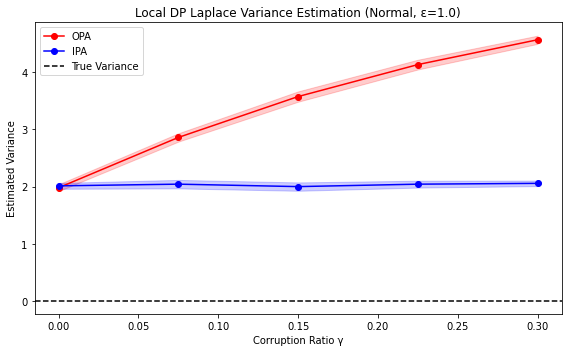

In [6]:
# Normal[0.5, 0.1^2] Distribution
normal_sampler = lambda n: np.clip(np.random.normal(loc=0.5, scale=0.1, size=n), 0, 1)
baseline_variance_normal = np.var(normal_sampler(100000))
results_normal = run_ldp_experiment(normal_sampler)
plot_ldp_results(results_normal, "Local DP Laplace Variance Estimation (Normal, ε=1.0)", baseline_variance_normal)

## Conclusion

This notebook investigates how variance estimation under Local Differential Privacy (LDP) using the Laplace mechanism is affected by poisoning attacks.

**Findings:**
- **Output Poisoning Attack (OPA)** leads to a steep increase in the estimated variance due to direct injection of extreme values.
- **Input Poisoning Attack (IPA)** causes moderate bias by shifting user inputs toward the upper bound of the data range.
- The results hold under both **Uniform** and **Normal** input distributions, although Normal distribution exhibits slightly lower variance and tighter error bands.

These findings suggest that LDP-based variance estimators are structurally vulnerable to OPA, and defense strategies must limit adversarial control or apply robust statistical filtering.

# Local DP Laplace Mechanism under Poisoning Attack (Mean Estimation)

This further evaluates the robustness of Local Differential Privacy (LDP) in estimating the **mean** using the Laplace mechanism. We analyze how adversaries performing poisoning attacks (OPA/IPA) affect estimation accuracy under different data distributions.

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
n = 10000
epsilon = 1.0
gamma_values = np.linspace(0, 0.3, 5)
num_trials = 5

# Simulation

def simulate_ldp_mean(n, epsilon, gamma, attack_type, dist_sampler):
    scale = 1 / epsilon
    n_corrupt = int(gamma * n)
    n_honest = n - n_corrupt

    honest_data = dist_sampler(n_honest)

    if attack_type == "OPA":
        poison_value = 1 + 5 / epsilon  # maximize mean
        corrupt_data = np.full(n_corrupt, poison_value)
    elif attack_type == "IPA":
        corrupt_data = np.ones(n_corrupt)

    combined_data = np.concatenate([honest_data, corrupt_data])
    noisy_data = combined_data + np.random.laplace(scale=scale, size=n)
    return np.mean(noisy_data)

# Run experiment

def run_ldp_mean_experiment(dist_sampler):
    results = {"OPA": [], "IPA": []}
    for gamma in gamma_values:
        for attack in ["OPA", "IPA"]:
            trials = [simulate_ldp_mean(n, epsilon, gamma, attack, dist_sampler) for _ in range(num_trials)]
            mean = np.mean(trials)
            std = np.std(trials)
            results[attack].append((gamma, mean, mean - 2 * std, mean + 2 * std))
    return results

# Plotting

def plot_ldp_mean_results(results, title, baseline_mean):
    plt.figure(figsize=(8, 5))
    for attack, color in zip(["OPA", "IPA"], ["red", "blue"]):
        arr = np.array(results[attack])
        plt.plot(arr[:, 0], arr[:, 1], marker='o', label=attack, color=color)
        plt.fill_between(arr[:, 0], arr[:, 2], arr[:, 3], color=color, alpha=0.2)
    plt.axhline(baseline_mean, color='black', linestyle='--', label='True Mean')
    plt.xlabel("Corruption Ratio γ")
    plt.ylabel("Estimated Mean")
    plt.title(title)
    plt.legend()
    plt.tight_layout()
    plt.show()

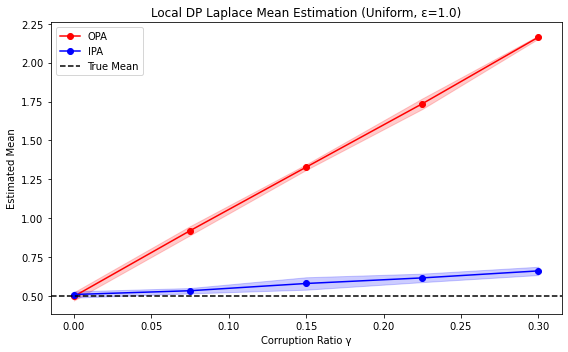

In [10]:
# Uniform[0,1] Distribution
np.random.seed(42)
uniform_sampler = lambda n: np.random.uniform(0, 1, size=n)
baseline_mean_uniform = 0.5
results_uniform = run_ldp_mean_experiment(uniform_sampler)
plot_ldp_mean_results(results_uniform, "Local DP Laplace Mean Estimation (Uniform, ε=1.0)", baseline_mean_uniform)

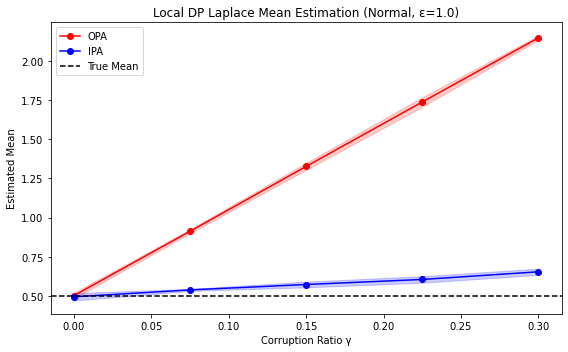

In [12]:
# Normal[0.5, 0.1^2] Distribution
normal_sampler = lambda n: np.clip(np.random.normal(loc=0.5, scale=0.1, size=n), 0, 1)
baseline_mean_normal = np.mean(normal_sampler(100000))
results_normal = run_ldp_mean_experiment(normal_sampler)
plot_ldp_mean_results(results_normal, "Local DP Laplace Mean Estimation (Normal, ε=1.0)", baseline_mean_normal)

## Conclusion

This notebook explores the effect of poisoning attacks on mean estimation under the Laplace mechanism with LDP.

**Findings:**
- **OPA** significantly biases the mean upward by injecting large values.
- **IPA** contributes moderate bias through edge-case inputs.
- The behavior holds across both Uniform and Normal data distributions.

LDP mean estimators are particularly vulnerable to high-magnitude OPA, and future work should explore hybrid defenses combining input constraints and robust estimation.
